In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [7]:
#importing MNIST dataset as training and testing dataset
import torch
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

print(train_dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./mnist_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [9]:
#can only be fed as the data into neural network after being packed in DataLoader
batchSize=128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batchSize, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batchSize, shuffle=False)

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision.utils import make_grid

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

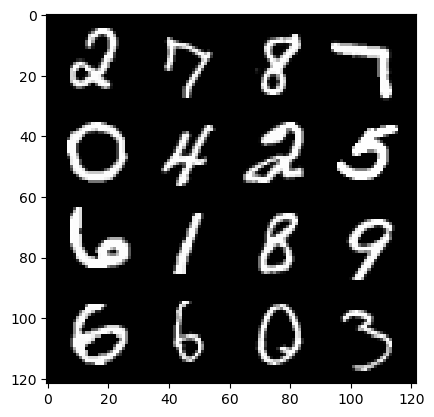

In [21]:
examples, _ = next(iter(train_loader))
example_show=make_grid(examples[:16,:,:,:], 4)
imshow(example_show)

In [26]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torchaudio (from versions: none)
ERROR: No matching distribution found for torchaudio
Note: you may need to restart the kernel to use updated packages.


In [23]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784

#Build the encoder
class Autoencoder(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2):
        super(Autoencoder, self).__init__()
        #encoder
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        #decoder
        self.fc3 = nn.Linear(h_dim2, h_dim1)
        self.fc4 = nn.Linear(h_dim1, x_dim)
        
    def encoder(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
    
    def decoder(self, x):
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x
    
    def forward(self, x):
        x = self.encoder(x)  # could probably access these layers separately
        x = self.decoder(x)
        return x
    
model = Autoencoder(num_input, num_hidden_1, num_hidden_2)
model.cuda()

AssertionError: Torch not compiled with CUDA enabled